In [184]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler

In [152]:
data = np.loadtxt("P1_4.txt")

In [153]:
x = data[:,1:]
y = data[:,0]

In [154]:
print("----- Imbalanced sample -----")
x = data[:,1:]
y = data[:,0]

kf = StratifiedKFold(n_splits=5, shuffle = True)
clf = SVC(kernel = 'linear')

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)

    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Imbalanced sample -----
              precision    recall  f1-score   support

         1.0       0.87      0.87      0.87       299
         2.0       0.96      0.96      0.96       895

    accuracy                           0.94      1194
   macro avg       0.92      0.92      0.92      1194
weighted avg       0.94      0.94      0.94      1194



In [155]:
print("----- Subsamplig -----")

clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.sample([i for i in range(n2)], n1)

    x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
    y_sub = np.concatenate((y1, y2[ind]), axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Subsamplig -----
              precision    recall  f1-score   support

         1.0       0.73      0.89      0.80       299
         2.0       0.96      0.89      0.93       895

    accuracy                           0.89      1194
   macro avg       0.85      0.89      0.87      1194
weighted avg       0.90      0.89      0.90      1194



In [156]:
print("----- Upsampling -----")
clf = SVC(kernel='linear')
kf = StratifiedKFold(n_splits=5, shuffle=True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k=n2)

    x_sub = np.concatenate((x1[ind,:], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    clf.fit(x_sub, y_sub)

    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Upsampling -----
              precision    recall  f1-score   support

         1.0       0.84      0.85      0.84       299
         2.0       0.95      0.94      0.95       895

    accuracy                           0.92      1194
   macro avg       0.89      0.90      0.90      1194
weighted avg       0.92      0.92      0.92      1194



In [157]:
print("----- Weighted loss function -----")
clf = SVC(kernel='linear', class_weight='balanced')
kf = StratifiedKFold(n_splits=5, shuffle=True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)

    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Weighted loss function -----
              precision    recall  f1-score   support

         1.0       0.83      0.88      0.85       299
         2.0       0.96      0.94      0.95       895

    accuracy                           0.92      1194
   macro avg       0.89      0.91      0.90      1194
weighted avg       0.92      0.92      0.92      1194



In [158]:
print('----- Linear-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'linear')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- Linear-SVM -----
              precision    recall  f1-score   support

         1.0       0.91      0.86      0.88       299
         2.0       0.95      0.97      0.96       895

    accuracy                           0.94      1194
   macro avg       0.93      0.91      0.92      1194
weighted avg       0.94      0.94      0.94      1194



In [159]:
print('----- RBF-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'rbf')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- RBF-SVM -----
              precision    recall  f1-score   support

         1.0       0.98      0.84      0.90       299
         2.0       0.95      0.99      0.97       895

    accuracy                           0.95      1194
   macro avg       0.96      0.91      0.94      1194
weighted avg       0.95      0.95      0.95      1194



In [160]:
print('----- KNN -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- KNN -----
              precision    recall  f1-score   support

         1.0       0.89      0.81      0.85       299
         2.0       0.94      0.97      0.95       895

    accuracy                           0.93      1194
   macro avg       0.91      0.89      0.90      1194
weighted avg       0.93      0.93      0.93      1194



In [161]:
print('----- Decision tree -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Decision tree -----
              precision    recall  f1-score   support

         1.0       0.72      0.71      0.71       299
         2.0       0.90      0.91      0.90       895

    accuracy                           0.86      1194
   macro avg       0.81      0.81      0.81      1194
weighted avg       0.86      0.86      0.86      1194



In [162]:
print('----- Linear Discriminant Analysis -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = LinearDiscriminantAnalysis()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear Discriminant Analysis -----
              precision    recall  f1-score   support

         1.0       0.89      0.87      0.88       299
         2.0       0.96      0.97      0.96       895

    accuracy                           0.94      1194
   macro avg       0.92      0.92      0.92      1194
weighted avg       0.94      0.94      0.94      1194



In [163]:
print('----- Naive Bayes -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = GaussianNB()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Naive Bayes -----
              precision    recall  f1-score   support

         1.0       0.84      0.88      0.86       299
         2.0       0.96      0.94      0.95       895

    accuracy                           0.93      1194
   macro avg       0.90      0.91      0.90      1194
weighted avg       0.93      0.93      0.93      1194



In [164]:
print('----- Gradient Boosting -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = GradientBoostingClassifier()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Gradient Boosting -----
              precision    recall  f1-score   support

         1.0       0.90      0.78      0.83       299
         2.0       0.93      0.97      0.95       895

    accuracy                           0.92      1194
   macro avg       0.91      0.87      0.89      1194
weighted avg       0.92      0.92      0.92      1194



In [165]:
print('----- Random Forest -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Random Forest -----
              precision    recall  f1-score   support

         1.0       0.94      0.78      0.85       299
         2.0       0.93      0.98      0.96       895

    accuracy                           0.93      1194
   macro avg       0.94      0.88      0.90      1194
weighted avg       0.93      0.93      0.93      1194



In [166]:
print('----- Logistic Regression -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]


    clf = LogisticRegression(max_iter=1000)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Logistic Regression -----
              precision    recall  f1-score   support

         1.0       0.92      0.88      0.90       299
         2.0       0.96      0.97      0.97       895

    accuracy                           0.95      1194
   macro avg       0.94      0.93      0.93      1194
weighted avg       0.95      0.95      0.95      1194



In [167]:
n_features = x.shape[1]

In [168]:
constant_filter = VarianceThreshold(threshold=0)
x_filtered = constant_filter.fit_transform(x)

print(f"Número de características originales: {x.shape[1]}")
print(f"Número de características restantes: {x_filtered.shape[1]}")

Número de características originales: 154
Número de características restantes: 153


In [169]:
print("----- Feature selection using 50% of predictors -----")

fselection = SelectKBest(f_classif, k=int(x_filtered.shape[1] / 2))
fselection.fit(x_filtered, y)

clf = SVC(kernel='linear')
x_transformed = fselection.transform(x_filtered)
clf.fit(x_transformed, y)

cv_y_test = []
cv_y_pred = []

kf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(x_filtered, y):
    x_train = x_filtered[train_index, :]
    y_train = y[train_index]

    x_test = x_filtered[test_index, :]
    y_test = y[test_index]

    clf_cv = SVC(kernel='linear')
    fselection_cv = SelectKBest(f_classif, k=int(x_filtered.shape[1] / 2))
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)

    clf_cv.fit(x_train, y_train)

    x_test = fselection_cv.transform(x_test)
    y_pred = clf_cv.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Feature selection using 50% of predictors -----
              precision    recall  f1-score   support

         1.0       0.87      0.87      0.87       299
         2.0       0.96      0.96      0.96       895

    accuracy                           0.93      1194
   macro avg       0.91      0.91      0.91      1194
weighted avg       0.93      0.93      0.93      1194



----- Optimal selection of number of features -----
features: 1, accuracy: 0.8359
features: 2, accuracy: 0.8819
features: 3, accuracy: 0.8995
features: 4, accuracy: 0.9137
features: 5, accuracy: 0.9146
features: 6, accuracy: 0.9138
features: 7, accuracy: 0.9079
features: 8, accuracy: 0.9213
features: 9, accuracy: 0.9187
features: 10, accuracy: 0.9213
features: 11, accuracy: 0.9204
features: 12, accuracy: 0.9213
features: 13, accuracy: 0.9255
features: 14, accuracy: 0.9305
features: 15, accuracy: 0.9380
features: 16, accuracy: 0.9355
features: 17, accuracy: 0.9364
features: 18, accuracy: 0.9397
features: 19, accuracy: 0.9397
features: 20, accuracy: 0.9405
features: 21, accuracy: 0.9363
features: 22, accuracy: 0.9372
features: 23, accuracy: 0.9388
features: 24, accuracy: 0.9414
features: 25, accuracy: 0.9347
features: 26, accuracy: 0.9372
features: 27, accuracy: 0.9372
features: 28, accuracy: 0.9389
features: 29, accuracy: 0.9364
features: 30, accuracy: 0.9397
features: 31, accuracy: 0.9

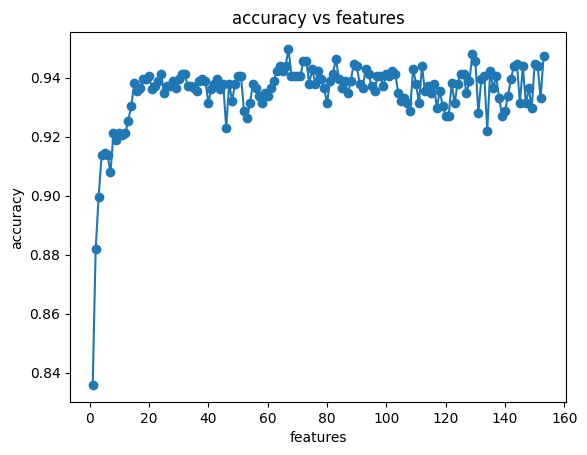

In [170]:
print("----- Optimal selection of number of features -----")

n_feats = np.arange(1, x_filtered.shape[1] + 1)
acc_nfeat = []

kf = StratifiedKFold(n_splits=5, shuffle=True)

for n_feat in n_feats:
    acc_cv = []
    for train_index, test_index in kf.split(x_filtered, y):
        x_train, x_test = x_filtered[train_index], x_filtered[test_index]
        y_train, y_test = y[train_index], y[test_index]

        fselection = SelectKBest(f_classif, k=n_feat)
        fselection.fit(x_train, y_train)

        x_train_sel = fselection.transform(x_train)
        x_test_sel = fselection.transform(x_test)

        clf = SVC(kernel='linear')
        clf.fit(x_train_sel, y_train)
        y_pred = clf.predict(x_test_sel)

        acc_cv.append(accuracy_score(y_test, y_pred))

    acc_nfeat.append(np.mean(acc_cv))
    print(f"features: {n_feat}, accuracy: {np.mean(acc_cv):.4f}")


opt_features = n_feats[np.argmax(acc_nfeat)]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat, marker='o')
plt.xlabel('features')
plt.ylabel('accuracy')
plt.title('accuracy vs features')
plt.show()

In [171]:
# Fit model with optimal number of features

fselection = SelectKBest(f_classif, k = opt_features)
fselection.fit(x, y)

selected_indices = fselection.get_support(indices=True)
print(f"features: {selected_indices}")

x_transformed = fselection.transform(x)
clf = SVC(kernel='linear')
clf.fit(x_transformed, y)

cv_y_test = []
cv_y_pred = []

kf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    fselection_cv = SelectKBest(f_classif, k=opt_features)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)

    clf_cv = SVC(kernel='linear')
    clf_cv.fit(x_train, y_train)

    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/pyt

features: [  1   2   3  11  12  13  16  17  18  19  20  21  23  24  25  26  27  28
  29  30  31  34  35  36  54  62  63  64  66  67  68  69  73  74  75  76
  80  81  82  83  84  88  89  90  91  92  93  94 102 119 120 121 125 126
 127 128 135 136 137 138 139 140 141 142 143 152 153]
              precision    recall  f1-score   support

         1.0       0.91      0.89      0.90       299
         2.0       0.96      0.97      0.97       895

    accuracy                           0.95      1194
   macro avg       0.93      0.93      0.93      1194
weighted avg       0.95      0.95      0.95      1194



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


---- n features = 1
accuracy: 0.8350
---- n features = 2
accuracy: 0.8953
---- n features = 3
accuracy: 0.8903
optimal number of features: 2


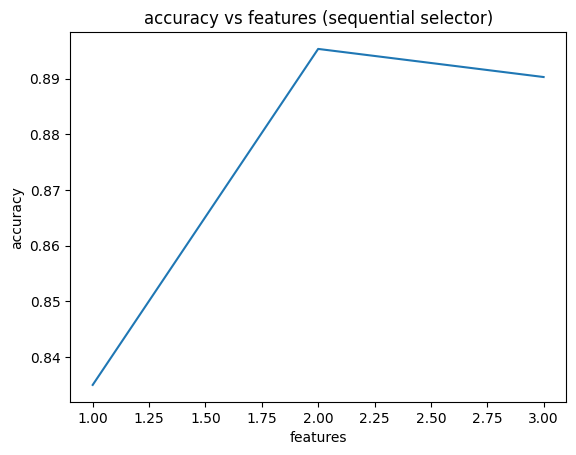

In [172]:
n_feats = np.arange(1, min(x.shape[1], 3) + 1)
acc_nfeat = []

for n_feat in n_feats:
    print(f"---- n features = {n_feat}")

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x, y):

        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(kernel='linear')

        fselection_cv = SequentialFeatureSelector(clf_cv, n_features_to_select=n_feat, direction='forward')
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        clf_cv.fit(x_train, y_train)

        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    print(f'accuracy: {acc:.4f}')

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print(f"optimal number of features: {opt_features}")

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("accuracy")
plt.title("accuracy vs features (sequential selector)")
plt.show()

In [173]:
print("---- Fit model (sequential)-----")

clf = SVC(kernel='linear')
fselection = SequentialFeatureSelector(clf, n_features_to_select=opt_features, direction='forward')
fselection.fit(x, y)

selected_indices = fselection.get_support(indices=True)
print(f"features: {selected_indices}")

x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

cv_y_test = []
cv_y_pred = []

kf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    fselection_cv = SequentialFeatureSelector(clf, n_features_to_select=opt_features, direction='forward')
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)

    clf_cv = SVC(kernel='linear')
    clf_cv.fit(x_train, y_train)

    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

---- Fit model (sequential)-----
features: [19 28]
              precision    recall  f1-score   support

         1.0       0.82      0.75      0.78       299
         2.0       0.92      0.95      0.93       895

    accuracy                           0.90      1194
   macro avg       0.87      0.85      0.86      1194
weighted avg       0.89      0.90      0.89      1194



In [ ]:
rfe = RFE(estimator=clf, n_features_to_select=int(n_features / 2))
rfe.fit(x, y)

selected_indices = rfe.get_support(indices=True)
print(f"features: {selected_indices}")

x_transformed = rfe.transform(x)

cv_y_test = []
cv_y_pred = []

kf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(x_transformed, y):
    x_train = x_transformed[train_index, :]
    y_train = y[train_index]

    x_test = x_transformed[test_index, :]
    y_test = y[test_index]

    clf_cv = SVC(kernel='linear')
    clf_cv.fit(x_train, y_train)

    y_pred = clf_cv.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

In [ ]:
print("----- Optimal selection of number of features -----")

n_feats = np.arange(1, min(x.shape[1], 3) + 1)
acc_nfeat = []

for n_feat in n_feats:
    print(f"---- n features = {n_feat}")
    acc_cv = []
    for train_index, test_index in kf.split(x, y):
        x_train = x[train_index, :]
        y_train = y[train_index]

        rfe = RFE(estimator=clf, n_features_to_select=n_feat)
        rfe.fit(x_train, y_train)

        x_train_sel = rfe.transform(x_train)
        x_test_sel = rfe.transform(x[test_index, :])

        clf.fit(x_train_sel, y_train)
        y_pred = clf.predict(x_test_sel)

        acc_i = accuracy_score(y[test_index], y_pred)
        acc_cv.append(acc_i)

    acc_nfeat.append(np.mean(acc_cv))
    print(f"features: {n_feat}, accuracy: {np.mean(acc_cv):.4f}")

opt_features = n_feats[np.argmax(acc_nfeat)]
print(f"Optimal number of features: {opt_features}")

plt.plot(n_feats, acc_nfeat, marker='o')
plt.xlabel('features')
plt.ylabel('accuracy')
plt.title('accuracy vs features')
plt.show()

In [175]:
rfe = RFE(estimator=clf, n_features_to_select=opt_features)
rfe.fit(x, y)

selected_indices = rfe.get_support(indices=True)
print(f"features: {selected_indices}")

x_transformed = rfe.transform(x)
clf.fit(x_transformed, y)

features: [20 28]


SVC(kernel='linear')

In [ ]:
opt_features = 10

fselection = SelectKBest(f_classif, k=opt_features)
fselection.fit(x, y)

selected_indices = fselection.get_support(indices=True)
print(f"features: {selected_indices}")

x_transformed = fselection.transform(x)

clf = SVC(kernel='linear')
clf.fit(x_transformed, y)

print("Modelo para producción.")

Contesta las siguientes preguntas:

a. ¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?

**R = El modelo puede tender a favorecer a la clase que es mayoría. El clasificador se inclinaría a predecir siempre la clase que es mayoría ignorando a la clase minoritaria.**

**Podría tener un muy alto accuracy, dando un falso ¨buen¨ rendimiento.**

**El modelo puede sobreajustarse a la clase mayoritaria porque tiene más datos para aprender de esa clase.**

b. De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.

**R = SVM y Random Forest parecen ser los más adecuados, ya que ofrecen propiedas necesarias para poder ajustarse a datos complejos y ambos pueden manejar clases desbalanceadas.**


b. ¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?

**R = Sí es posible. En muchos casos los modelos no necesitan todas las caracteristicas para tener un buen rendimiento, reducir la dimensionalidad ayuda a eliminar ruido y se vuelve más eficiente.**


c. ¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?

**El método filter es el más adecuado por su simplicidad, eficiencia, independencia y la capacidad para identificar las características más relevantes.**

d.  Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?

**R = Es fundamental balancear datos y seleccionar características, optimizar hiperparámetros y probar modelos más avanzados.**

In [187]:
data = np.loadtxt('M_3.txt')

In [188]:
x = data[:,1:]
y = data[:,0]

Distribución de clases: {1.0: 90, 2.0: 90, 3.0: 90, 4.0: 90, 5.0: 90, 6.0: 90, 7.0: 90}


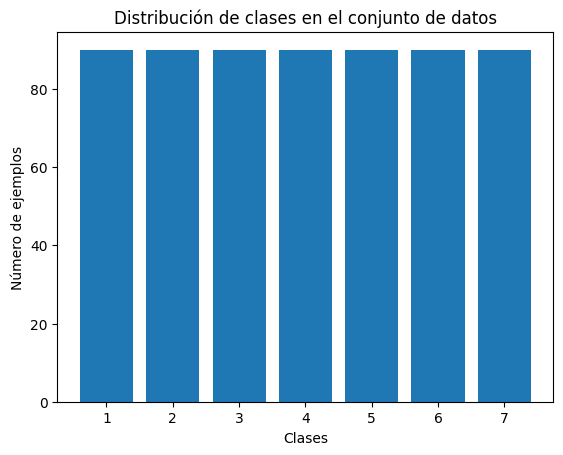

Proporción de la clase 1.0: 14.29%
Proporción de la clase 2.0: 14.29%
Proporción de la clase 3.0: 14.29%
Proporción de la clase 4.0: 14.29%
Proporción de la clase 5.0: 14.29%
Proporción de la clase 6.0: 14.29%
Proporción de la clase 7.0: 14.29%
No es necesario balancear los datos.


In [189]:
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))

print("Distribución de clases:", class_distribution)

plt.bar(unique, counts)
plt.xlabel('Clases')
plt.ylabel('Número de ejemplos')
plt.title('Distribución de clases en el conjunto de datos')
plt.show()

total = sum(counts)
class_ratios = [count / total for count in counts]

for i, ratio in enumerate(class_ratios):
    print(f"Proporción de la clase {unique[i]}: {ratio:.2%}")

if min(class_ratios) / max(class_ratios) < 0.5:
    print("Es necesario balancear los datos.")
else:
    print("No es necesario balancear los datos.")

In [178]:
print('----- Linear-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'linear')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear-SVM -----
              precision    recall  f1-score   support

         1.0       0.86      0.86      0.86       299
         2.0       0.95      0.95      0.95       895

    accuracy                           0.93      1194
   macro avg       0.91      0.91      0.91      1194
weighted avg       0.93      0.93      0.93      1194



In [179]:
print('----- RBF-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'rbf')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- RBF-SVM -----
              precision    recall  f1-score   support

         1.0       0.97      0.84      0.90       299
         2.0       0.95      0.99      0.97       895

    accuracy                           0.95      1194
   macro avg       0.96      0.92      0.94      1194
weighted avg       0.95      0.95      0.95      1194



In [180]:
print('----- KNN -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- KNN -----
              precision    recall  f1-score   support

         1.0       0.89      0.80      0.84       299
         2.0       0.93      0.97      0.95       895

    accuracy                           0.93      1194
   macro avg       0.91      0.88      0.90      1194
weighted avg       0.92      0.93      0.92      1194



In [181]:
print('----- Decision tree -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Decision tree -----
              precision    recall  f1-score   support

         1.0       0.73      0.73      0.73       299
         2.0       0.91      0.91      0.91       895

    accuracy                           0.86      1194
   macro avg       0.82      0.82      0.82      1194
weighted avg       0.86      0.86      0.86      1194



In [182]:
print('----- Linear Discriminant Analysis -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = LinearDiscriminantAnalysis()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear Discriminant Analysis -----
              precision    recall  f1-score   support

         1.0       0.90      0.85      0.87       299
         2.0       0.95      0.97      0.96       895

    accuracy                           0.94      1194
   macro avg       0.92      0.91      0.91      1194
weighted avg       0.94      0.94      0.94      1194



In [183]:
print('----- Naive Bayes -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = GaussianNB()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Naive Bayes -----
              precision    recall  f1-score   support

         1.0       0.84      0.90      0.87       299
         2.0       0.97      0.94      0.95       895

    accuracy                           0.93      1194
   macro avg       0.90      0.92      0.91      1194
weighted avg       0.93      0.93      0.93      1194

----- Naive Bayes -----
              precision    recall  f1-score   support

         1.0       0.84      0.90      0.87       299
         2.0       0.97      0.94      0.95       895

    accuracy                           0.93      1194
   macro avg       0.90      0.92      0.91      1194
weighted avg       0.93      0.93      0.93      1194



In [ ]:
print('----- Gradient Boosting -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = GradientBoostingClassifier()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Gradient Boosting -----


In [ ]:
print('----- Random Forest -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

In [ ]:
param_grid_svm = {'C': np.logspace(-3, 1, 10)}
param_grid_knn = {'n_neighbors': np.arange(1, 15)}

svm_model = SVC(kernel='linear')
knn_model = KNeighborsClassifier()

inner_cv = StratifiedKFold(n_splits=5, shuffle=True)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True)

svm_grid = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=inner_cv)
svm_scores = []

for train_index, test_index in outer_cv.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm_grid.fit(x_train, y_train)
    y_pred = svm_grid.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    svm_scores.append(acc)
    print(f"SVM Fold Accuracy: {acc:.4f}")

print(f"SVM mean accuracy: {np.mean(svm_scores):.4f}")

# GridSearch para KNN
knn_grid = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=inner_cv)
knn_scores = []

for train_index, test_index in outer_cv.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn_grid.fit(x_train, y_train)
    y_pred = knn_grid.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    knn_scores.append(acc)
    print(f"KNN fold accuracy: {acc:.4f}")

print(f"KNN mean accuracy: {np.mean(knn_scores):.4f}")

print(f"best SVM hyperparameter C: {svm_grid.best_params_}")
print(f"best KNN hyperparameter n_neighbors: {knn_grid.best_params_}")

plt.bar(['SVM', 'KNN'], [np.mean(svm_scores), np.mean(knn_scores)])
plt.ylabel('mean accuracy')
plt.title('nested cross-validation')
plt.show()

In [ ]:
param_grid_svm = {'C': np.logspace(-3, 1, 10)}
param_grid_knn = {'n_neighbors': np.arange(1, 15)}

svm_model = SVC(kernel='linear')
knn_model = KNeighborsClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True)

svm_grid = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=cv)
svm_grid.fit(x, y)
best_svm = svm_grid.best_estimator_

print(f"best SVM hyperparameter C: {svm_grid.best_params_}")

knn_grid = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=cv)
knn_grid.fit(x, y)
best_knn = knn_grid.best_estimator_

print(f"best KNN hyperparameter n_neighbors: {knn_grid.best_params_}")


best_svm.fit(x, y)
best_knn.fit(x, y)